In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [7]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [9]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
def get_unique_values_from_df(df):
    for col in df:
        if df[col].dtypes == 'object':
            print(f'{col} : {df[col].unique()}')

In [12]:
get_unique_values_from_df(df)

Geography : ['France' 'Spain' 'Germany']
Gender : ['Female' 'Male']


In [13]:
df.replace({'Female': 1, 'Male': 0}, inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,1,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,1,41,1,83807.86,1,0,1,112542.58,0
2,502,France,1,42,8,159660.80,3,1,0,113931.57,1
3,699,France,1,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,1,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,0,39,5,0.00,2,1,0,96270.64,0
9996,516,France,0,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,1,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,0,42,3,75075.31,2,1,0,92888.52,1


In [14]:
df = pd.get_dummies(data=df, columns=['Geography'])
df.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [15]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
5163,850,1,36,10,0.00,2,1,1,100750.03,0,True,False,False
8267,654,0,38,8,0.00,2,1,0,88659.44,0,True,False,False
1182,673,1,43,5,168069.73,1,1,1,146992.24,1,True,False,False
7946,473,1,35,6,69617.36,1,1,0,143345.69,0,True,False,False
6667,622,1,26,8,0.00,2,1,1,124964.82,0,False,False,True


In [16]:
cols_to_astype = ['Geography_France', 'Geography_Germany', 'Geography_Spain']
df[cols_to_astype] = df[cols_to_astype].astype(int)

In [17]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
6230,592,0,71,4,0.00,2,0,1,17013.54,0,1,0,0
2001,661,1,27,3,0.00,2,1,1,76889.79,0,1,0,0
5886,607,0,40,5,90594.55,1,0,1,181598.25,0,0,1,0
4604,681,0,25,5,0.00,1,0,1,90860.97,0,1,0,0
4833,762,0,32,10,191775.65,1,1,0,179657.83,0,1,0,0


In [19]:
cols_to_scale = ['CreditScore','Age','Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [20]:
df.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
2996,0.758,1,0.364865,0.7,0.36306,0.333333,1,0,0.355642,0,0,0,1
6902,0.214,0,0.351351,0.7,0.00000,0.333333,0,0,0.929993,0,0,0,1
2601,0.544,1,0.310811,0.9,0.00000,0.333333,1,1,0.778948,0,0,0,1
5857,0.488,1,0.513514,0.7,0.00000,0.000000,1,0,0.131034,1,1,0,0
3293,0.802,1,0.283784,0.3,0.00000,0.333333,1,1,0.420859,0,1,0,0


In [32]:
df.shape

(10000, 13)

In [23]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

In [31]:
X_train.shape[0] / df.shape[0] + X_test.shape[0] / df.shape[0]

1.0

In [40]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(12,), activation='relu'),
    keras.layers.Dropout(.2, input_shape=(10,)),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6012 - accuracy: 0.6846
Epoch 2/100
250/250 [==============================] - 0s 2ms/step - loss: 0.5066 - accuracy: 0.7959
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5006 - accuracy: 0.7960
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4902 - accuracy: 0.7962
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4830 - accuracy: 0.7961
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4816 - accuracy: 0.7959
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7961
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4715 - accuracy: 0.7960
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7985
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4549 - accura

250/250 [==============================] - 0s 1ms/step - loss: 0.3714 - accuracy: 0.8441
Epoch 82/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3734 - accuracy: 0.8416
Epoch 83/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3707 - accuracy: 0.8405
Epoch 84/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3788 - accuracy: 0.8369
Epoch 85/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3749 - accuracy: 0.8406
Epoch 86/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3771 - accuracy: 0.8389
Epoch 87/100
250/250 [==============================] - 1s 2ms/step - loss: 0.3728 - accuracy: 0.8399
Epoch 88/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3663 - accuracy: 0.8440
Epoch 89/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3738 - accuracy: 0.8416
Epoch 90/100
250/250 [==============================] - 0s 2ms/step - loss: 0.3711 - accuracy: 

In [41]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3540 - accuracy: 0.8505


[0.3539741635322571, 0.8504999876022339]

In [45]:
yp = model.predict(X_test)
yp[:10]

63/63 [==============================] - 0s 799us/step


array([[0.04107266],
       [0.08476758],
       [0.08006903],
       [0.06362517],
       [0.08718093],
       [0.151741  ],
       [0.02853383],
       [0.34436253],
       [0.02772204],
       [0.8947095 ]], dtype=float32)

In [56]:
y_pred = [round(x[0]) for x in yp]
y_pred

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [55]:
yp

array([[0.04107266],
       [0.08476758],
       [0.08006903],
       ...,
       [0.02446777],
       [0.01697953],
       [0.06991722]], dtype=float32)

In [46]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [57]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1595
           1       0.76      0.39      0.51       405

    accuracy                           0.85      2000
   macro avg       0.81      0.68      0.71      2000
weighted avg       0.84      0.85      0.83      2000



Text(95.72222222222221, 0.5, 'Truth')

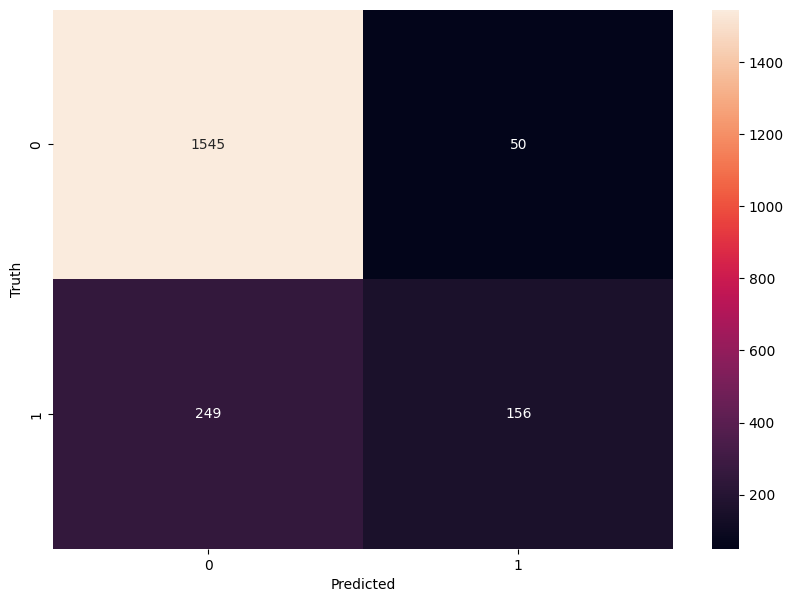

In [58]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [66]:
accuracy = (1545+156) / (1545+156+50+249)
accuracy

0.8505

In [59]:
recall_1 = (156)/(156+249)
recall_1

0.3851851851851852

In [60]:
precision_1 = (156)/(156+50)
precision_1

0.7572815533980582

In [61]:
f1_score_1 = (2*recall_1*precision_1) / (recall_1+precision_1)
f1_score_1

0.5106382978723405

##### ------------------------

In [63]:
recall_2 = (1545)/(1545+50)
recall_2

0.9686520376175548

In [64]:
precision_2 = (1545)/(1545+249)
precision_2

0.8612040133779264

In [65]:
f1_score_2 = (2*recall_2*precision_2) / (recall_2+precision_2)
f1_score_2

0.9117733844791974